In [3]:
import warnings
warnings.filterwarnings('ignore')

## Previsão de Expectativa de vida

# Contexto
Embora tenha havido muitos estudos realizados no passado sobre os fatores que afetam a expectativa de vida considerando variáveis ​​demográficas, composição de renda e taxas de mortalidade. Verificou-se que o efeito da imunização e o índice de desenvolvimento humano não foram levados em consideração no passado. Além disso, algumas das pesquisas anteriores foram feitas considerando regressão linear múltipla com base no conjunto de dados de um ano para todos os países. Portanto, isso dá motivação para resolver ambos os fatores mencionados anteriormente, formulando um modelo de regressão baseado no modelo de efeitos mistos e regressão linear múltipla, considerando dados de um período de 2000 a 2015 para todos os países. Imunizações importantes como Hepatite B, Poliomielite e Difteria também serão consideradas. Em poucas palavras, este estudo se concentrará em fatores de imunização, fatores de mortalidade, fatores econômicos, fatores sociais e outros fatores relacionados à saúde também. Como as observações deste conjunto de dados são baseadas em diferentes países, será mais fácil para um país determinar o fator de previsão que está contribuindo para o menor valor da expectativa de vida. Isso ajudará a sugerir a um país qual área deve receber importância para melhorar de forma eficiente a expectativa de vida de sua população.

# Conteudo
O projeto depende da precisão dos dados. O repositório de dados do Observatório da Saúde Global (GHO) da Organização Mundial da Saúde (OMS) acompanha o estado de saúde, bem como muitos outros fatores relacionados para todos os países. Os conjuntos de dados são disponibilizados ao público para fins de análise de dados de saúde. O conjunto de dados relacionado à expectativa de vida, fatores de saúde para 193 países foi coletado do mesmo site do repositório de dados da OMS e seus dados econômicos correspondentes foram coletados do site das Nações Unidas. Entre todas as categorias de fatores relacionados à saúde foram escolhidos apenas os fatores críticos que são mais representativos. Observou-se que, nos últimos 15 anos, houve um grande desenvolvimento no setor da saúde, resultando na melhora das taxas de mortalidade humana, especialmente nas nações em desenvolvimento, em comparação com os últimos 30 anos. Portanto, neste projeto consideramos dados do ano 2000-2015 para 193 países para análise posterior. Os arquivos de dados individuais foram mesclados em um único conjunto de dados. Na inspeção visual inicial dos dados mostraram alguns valores ausentes. Como os conjuntos de dados eram da OMS, não encontramos erros evidentes. Os dados ausentes foram tratados no software R usando o comando Missmap. O resultado indicou que a maioria dos dados faltantes era para população, Hepatite B e PIB. Os dados em falta eram de países menos conhecidos como Vanuatu, Tonga, Togo, Cabo Verde, etc. Encontrar todos os dados para estes países foi difícil e, portanto, foi decidido que excluímos estes países do conjunto de dados do modelo final. O arquivo mesclado final (conjunto de dados final) consiste em 22 colunas e 2938 linhas, o que significa 20 variáveis ​​de previsão. Todas as variáveis ​​preditoras foram então divididas em várias categorias amplas: Fatores relacionados à imunização, Fatores de mortalidade, Fatores econômicos e Fatores sociais.

https://www.kaggle.com/code/aishwaryakshirsagar/96-r2-score-and-eda

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error,make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

## EDA

In [40]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head(5)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [41]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [42]:
df.info(),df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

(None,
 Country                              0
 Year                                 0
 Status                               0
 Life expectancy                     10
 Adult Mortality                     10
 infant deaths                        0
 Alcohol                            194
 percentage expenditure               0
 Hepatitis B                        553
 Measles                              0
  BMI                                34
 under-five deaths                    0
 Polio                               19
 Total expenditure                  226
 Diphtheria                          19
  HIV/AIDS                            0
 GDP                                448
 Population                         652
  thinness  1-19 years               34
  thinness 5-9 years                 34
 Income composition of resources    167
 Schooling                          163
 dtype: int64)

In [43]:
df = df.interpolate(method = 'linear', limit_direction = 'forward')

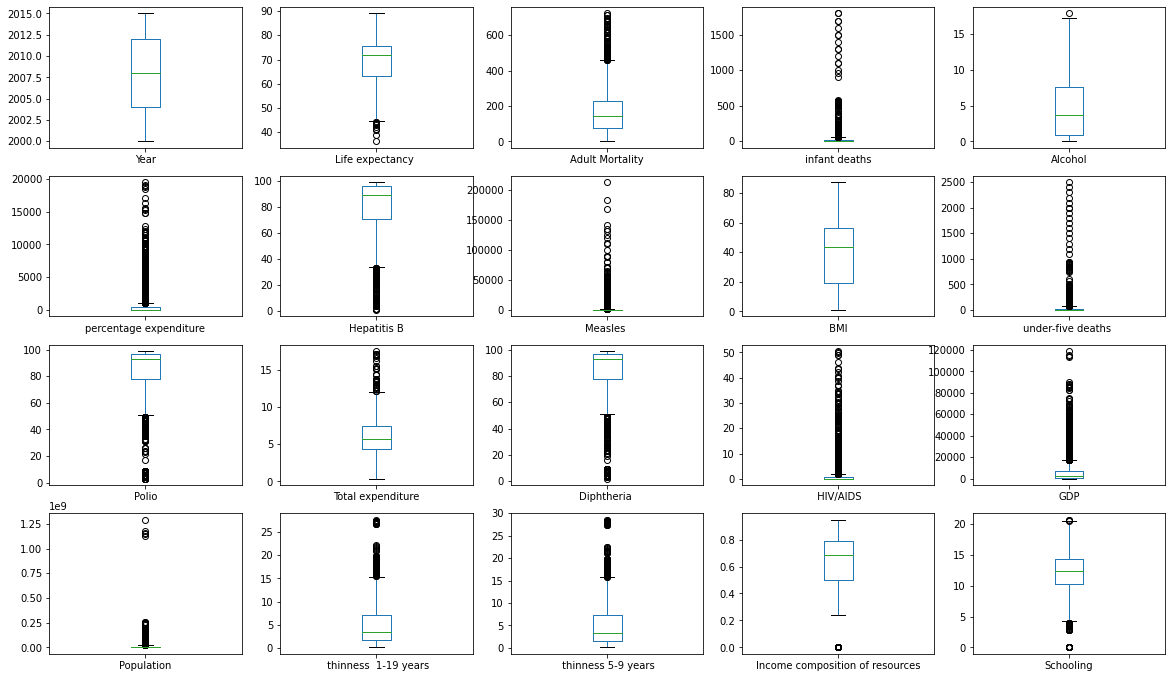

In [44]:
df[['Year','Life expectancy ','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles ',' BMI ','under-five deaths ','Polio','Total expenditure','Diphtheria ',' HIV/AIDS','GDP','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling']].plot(kind='box', figsize=(20,15), subplots=True, layout=(5,5))
plt.show()

In [26]:
def outlier_check(data_check):
  q1 = data_check.quantile(0.25)
  q3 = data_check.quantile(0.75)
  iqr = q3-q1
  lower_limit = q1 - 1.5*iqr
  upper_limi = q3 + 1.5*iqr
  lower_outlier = data_check < lower_limit
  upper_outlier = data_check > upper_limi
  return   data_check[(lower_outlier | upper_outlier)]

# Let's see the outliers percentage in every column
for col_name,values in df.items():
  if df[col_name].dtype == "float64":
    percntge = (len(outlier_check(df[col_name]))/len(df))*100
    print(col_name, ":", percntge,"%")

Life expectancy  : 0.3403675970047651 %
Adult Mortality : 2.791014295439074 %
Alcohol : 0.0 %
percentage expenditure : 13.240299523485364 %
Hepatitis B : 8.645336963921036 %
 BMI  : 0.0 %
Polio : 9.496255956432947 %
Total expenditure : 1.0891763104152483 %
Diphtheria  : 10.142954390742002 %
 HIV/AIDS : 18.447923757658273 %
GDP : 12.423417290673928 %
Population : 10.006807351940095 %
 thinness  1-19 years : 3.02927161334241 %
 thinness 5-9 years : 3.2675289312457454 %
Income composition of resources : 4.424778761061947 %
Schooling : 1.4976174268209665 %


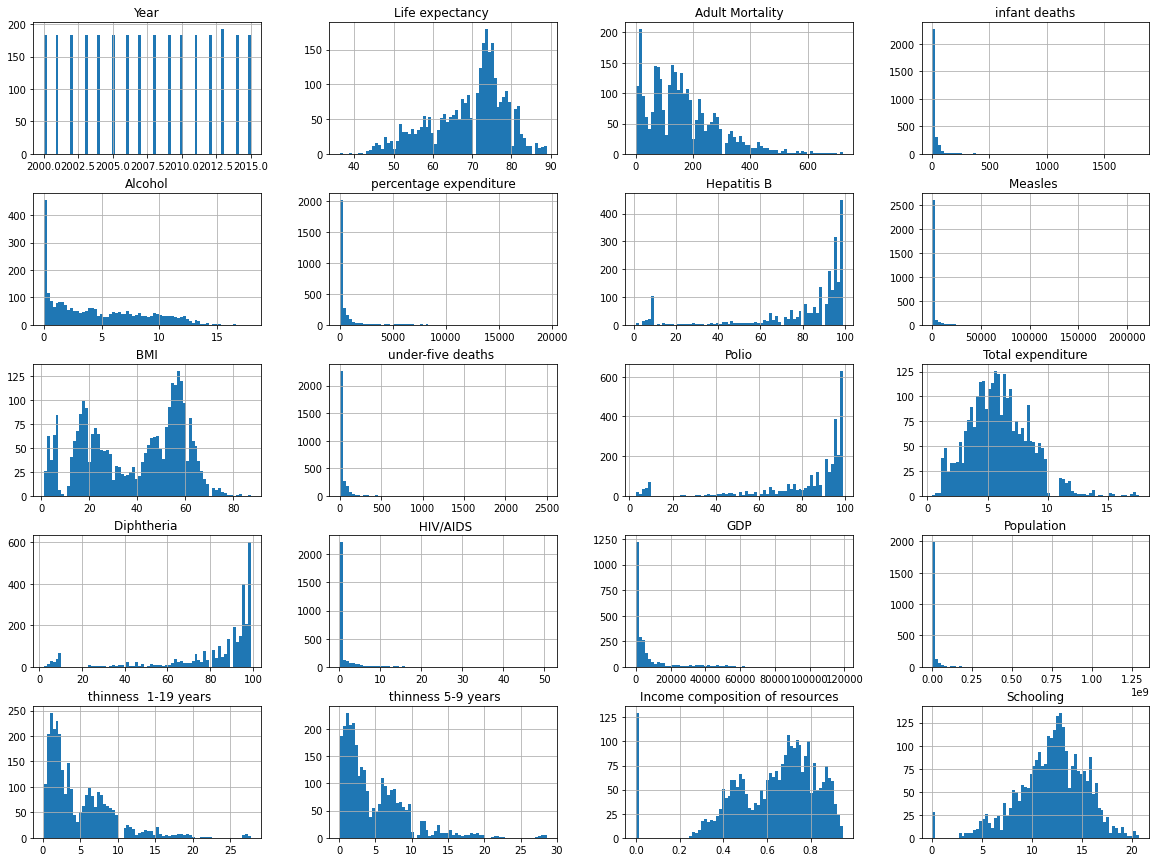

In [27]:
df.hist(bins=70, figsize=(20,15))
plt.show()

### Conclusão

- A partir do box plot e do histograma percebe-se que diversar variavíes possuem assimetria positiva, principalmente às que são relacionadas com a taca de mortalidade. Isto ocorre por ter relação direta com o comportamento da variavel população que tem o mermo formato de distribuição

- A colunas, possuem valores nulos que foram tratados via interpolação há qual foi possivel por se tratar de uma série historica onde há influencia dos valores passados no valor futuro: 
    Life expectancy                     10
    Adult Mortality                     10
    Alcohol                            194
    Hepatitis B                        553
    BMI                                34
    Polio                               19
    Total expenditure                  226
    Diphtheria                          19
    GDP                                448
    Population                         652
    thinness  1-19 years               34
    thinness 5-9 years                 34
    Income composition of resources    167
    Schooling                          163



### Correlation

<AxesSubplot:>

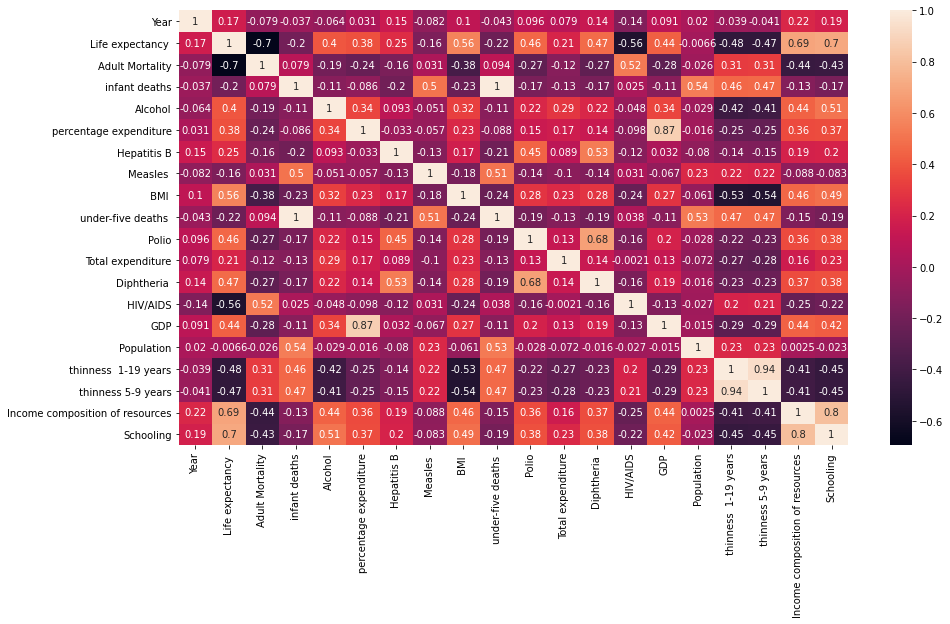

In [45]:
fig = plt.figure(figsize =(15,8))
sns.heatmap(df.corr(),annot= True)

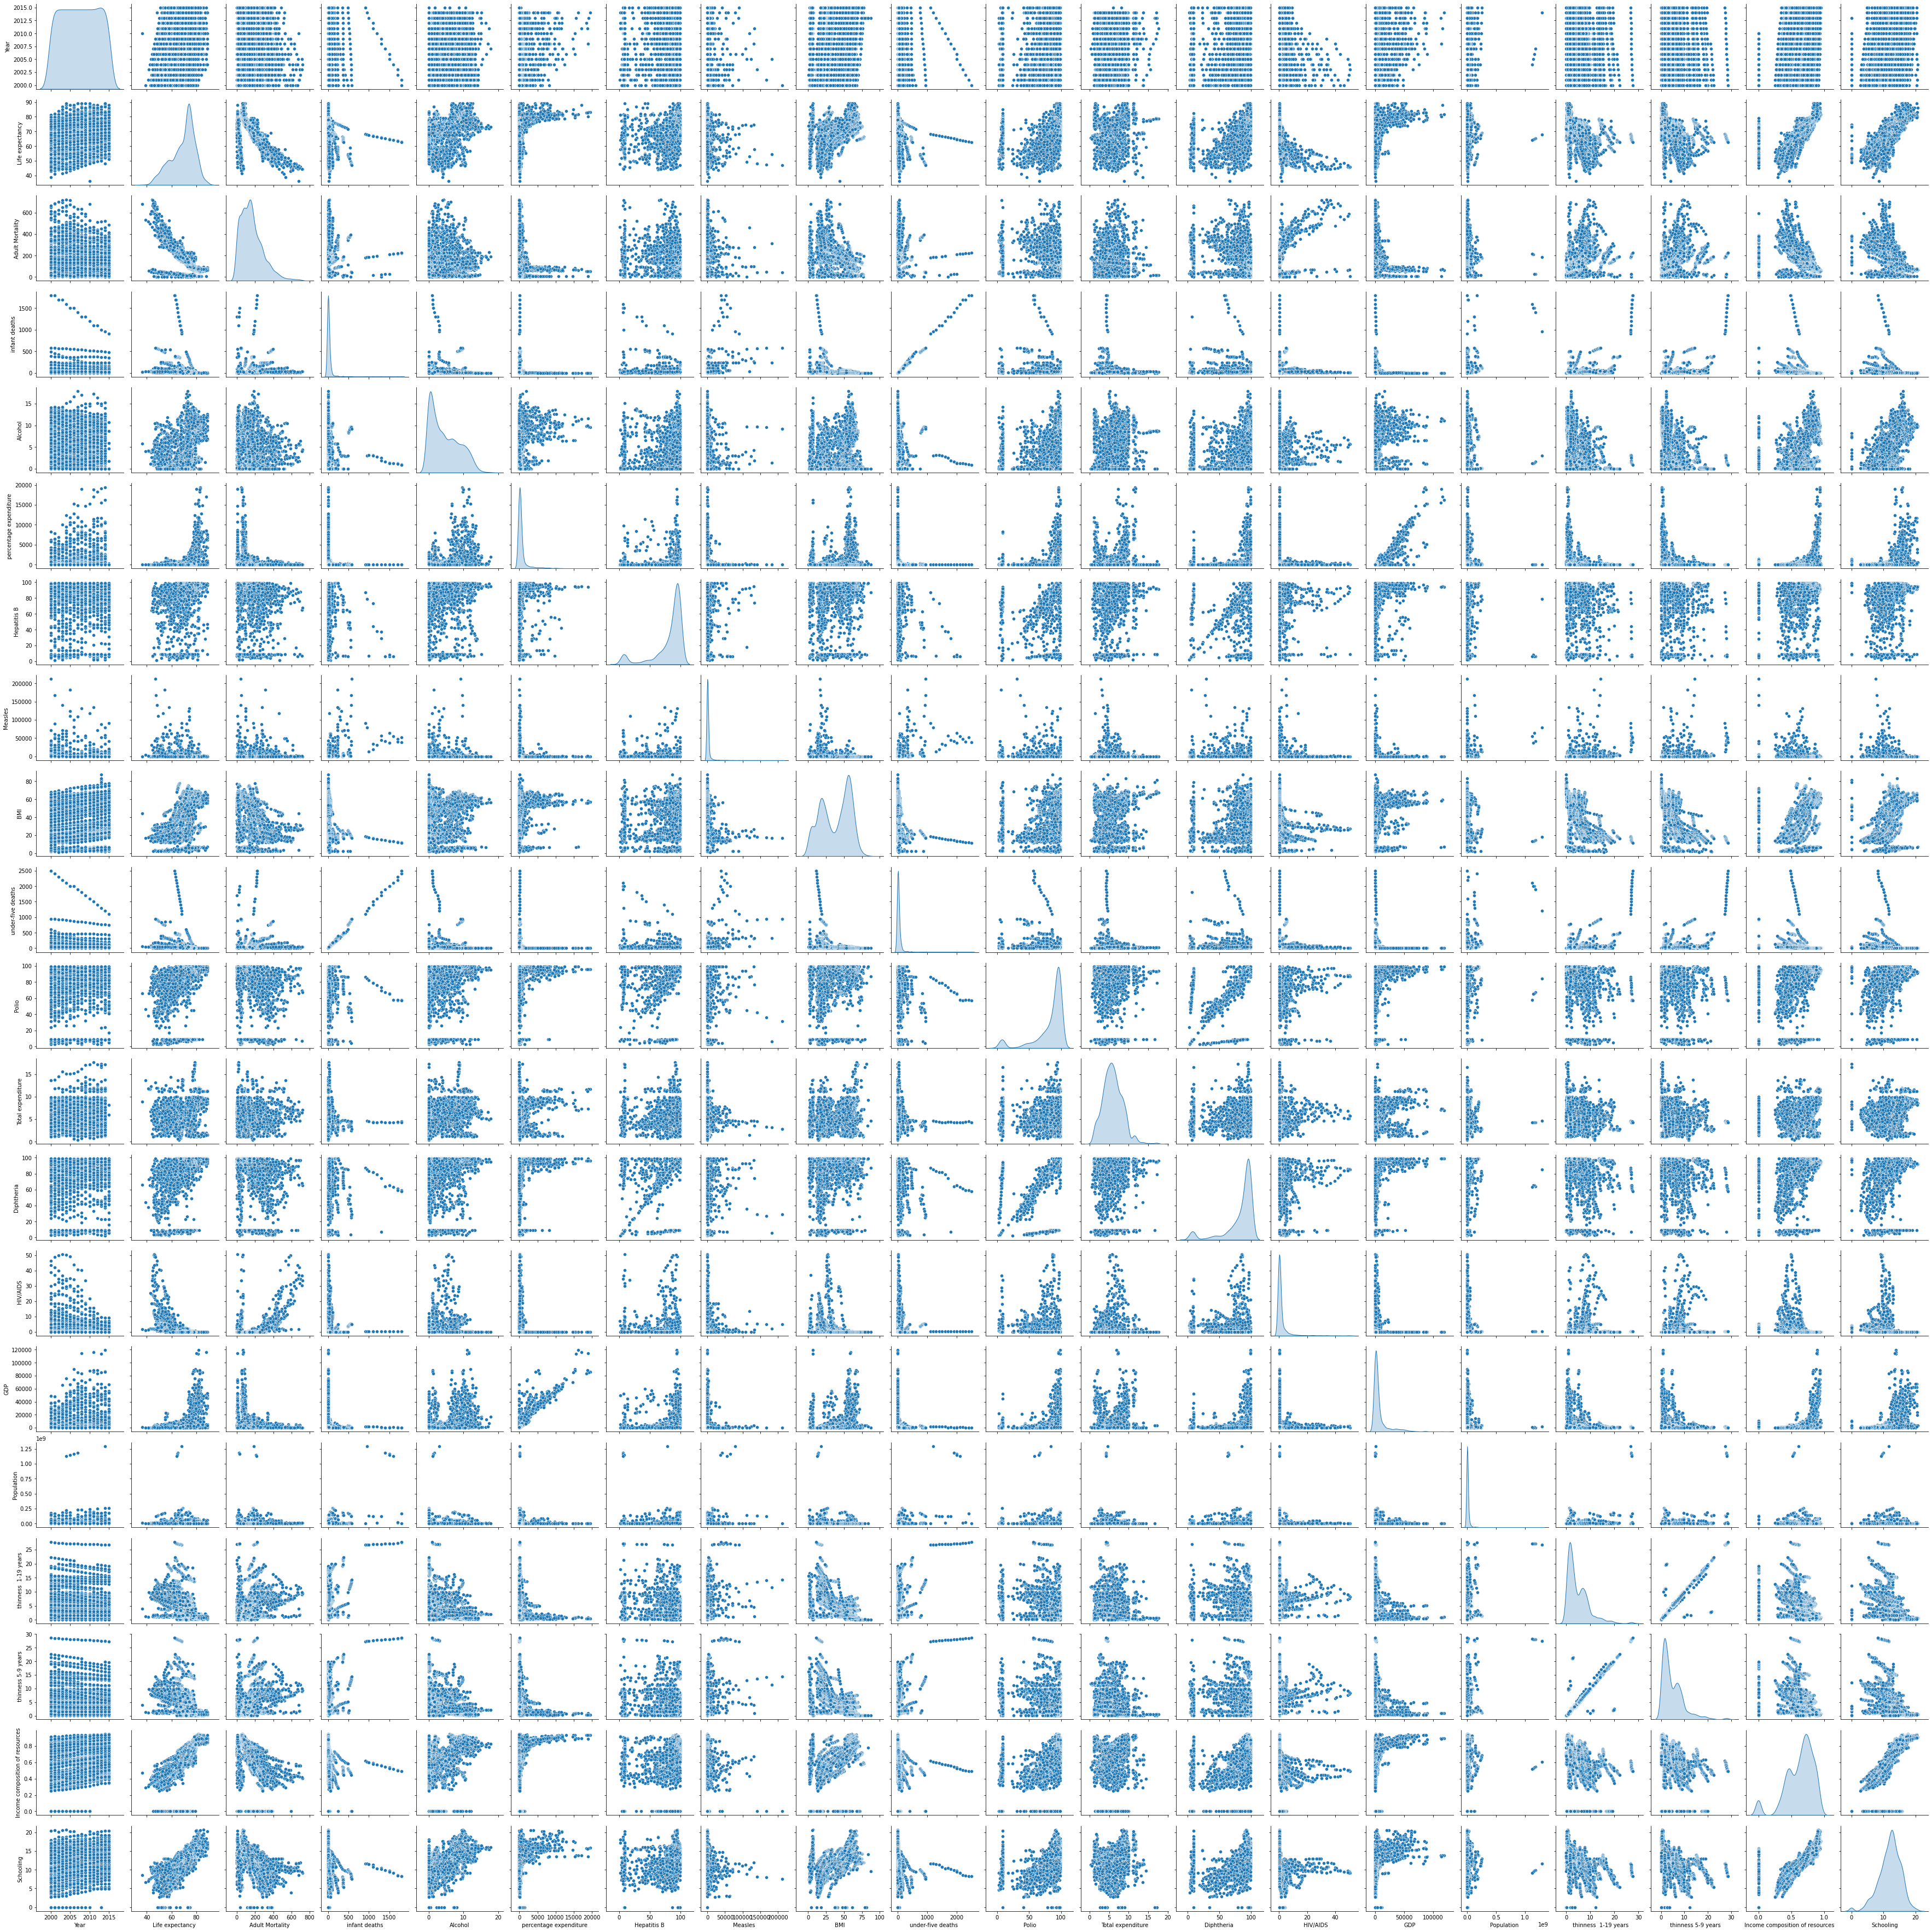

In [29]:
sns.pairplot(df, diag_kind="kde")

### Conclusão

Com relação à correlação entre as variáveis:

- Não existem muitas variáveis fortemente correlacionadas. Porém algumas são diretamente corerlacionadas com a expectativa de vida de um páis como o indice de escolaridade e a riqueza da população. O que pode ser avaliado tambem através do pair plot
- Mortalidade Adulta é altamente inversamente correlacionada com a expectativa de vida de um pais, conforma ja era esperado.
- Por haver diversas variavéis relacionadas a doenças, muitas variaveís possuem correlação negativa em relação a expectativa de vida



## Train Test Split

In [46]:
df['Status'] = df.Status.map({'Developing':0, 'Developed': 1})

In [47]:
df = df.drop(columns=['Country','Year'])

In [48]:
X = df.drop("Life expectancy ", axis=1)
y = df["Life expectancy "].copy()

In [49]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [50]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state= 13)
print(train_X.shape, train_y.shape,test_X.shape, test_y.shape)

(2203, 19) (2203,) (735, 19) (735,)


# Model Tunning And Validation

In [52]:
models = []
models.append(('LR', LinearRegression(),{"fit_intercept": [True, False]}))
models.append(('RD', Ridge(), {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False]}))
models.append(('LSS', Lasso(),{'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False]}))
models.append(('ELN', ElasticNet(), {"alpha": [1,0.1,0.01,0],"l1_ratio":[1,0.1,0.01,0]}))
models.append(('SVR', SVR(gamma='auto'),{'C': [0.1,1, 10, 100],'kernel': ['rbf']}))
# evaluate each model in turn
scoring = {'R2':'r2','MSE':make_scorer(mean_squared_error),'MAPE':make_scorer(mean_absolute_percentage_error)}

scores_map = pd.DataFrame()

for name, model,params in models:
    tuned_model = GridSearchCV(estimator=model, 
                   param_grid=params,
                   scoring=scoring, 
                   verbose=1,
                   refit = 'R2',
                   cv =  8,
                   return_train_score=True)
    tuned_model.fit(X,y)
    #cv_results = cross_val_score(tuned_model, X, y, cv=10, scoring="neg_mean_squared_error")
    cv_results = pd.DataFrame(tuned_model.cv_results_)
    print("***** ", name, "*****")
    best_result = cv_results[cv_results['params']==tuned_model.cv_results_['params'][tuned_model.best_index_]]
    best_result['model'] = name
    scores_map = scores_map.append(best_result)
    

Fitting 8 folds for each of 2 candidates, totalling 16 fits
*****  LR *****
Fitting 8 folds for each of 12 candidates, totalling 96 fits
*****  RD *****
Fitting 8 folds for each of 12 candidates, totalling 96 fits
*****  LSS *****
Fitting 8 folds for each of 16 candidates, totalling 128 fits
*****  ELN *****
Fitting 8 folds for each of 4 candidates, totalling 32 fits
*****  SVR *****


In [53]:
scores_map.to_excel('results.xlsx',index=False)